## <b>Task#1 </b>:Convert RGB color image to gray.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.bmp')# My reference Image


In [ ]:
 print(image.shape)

(512, 512, 3)


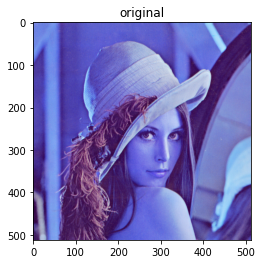

In [ ]:
plt.title('original')
plt.imshow(image)

In [ ]:
def RGBtoGRAY(image):
    return np.dot(image[...,:3], [0.3, 0.5, 0.2])

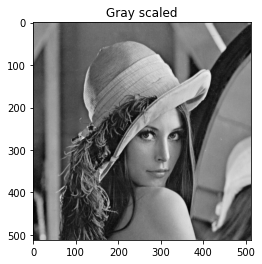

In [ ]:
grayscaled_image = RGBtoGRAY(image)    
plt.imshow(grayscaled_image, cmap=plt.get_cmap('gray'))
plt.title('Gray scaled')
plt.show()

In [ ]:
print(grayscaled_image.shape)

(512, 512)


## <b>Task#2: </b>Change the input image intensity

In [ ]:
def intensityChanger(image,offset):
    HSV_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #converted it to hue,intensity and value format
    HSV_image[:,:,2] += offset                      #just changing the intensity value of hsv format
    return HSV_image


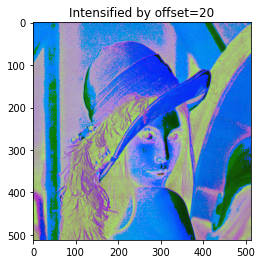

In [ ]:
offset=20;                                                 #defined offset
intensified_image = intensityChanger(image,offset)    
plt.imshow(intensified_image)
plt.title('Intensified by offset='+str(offset))
plt.show()

## <b>Task#3: </b>Generate the video by cropping 128x128 block from 512x512 image using the following order.

1.   From (0,0), scan rightward.
2.   When it reaches the end, then scan downward.
3.   When it reaches the end, then scan leftward
4.   Input : 512x512 image
5.   Output : 128x128 video



In [ ]:
def imageCropper(image,x,y,heigth,width):
    crop_image = image[y:y+heigth, x:x+width]
    cv2.waitKey(0)                    
    return crop_image

In [ ]:
from matplotlib import animation
images = []
height=128
width=128
for m in range(1, width):
  for n in range(1, height):
    crop_image = imageCropper(image,(m-1)*width+1,(n-1)*height+1,height,width)
    images.append(crop_image)

In [ ]:
import glob
size = (width,height)
out = cv2.VideoWriter('image_2_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
for image_frame in images:
    out.write(image_frame)

out.release()



## <b>Task#4: </b>Find the histogram for given input gray image.

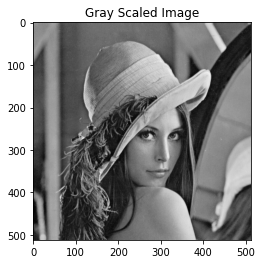

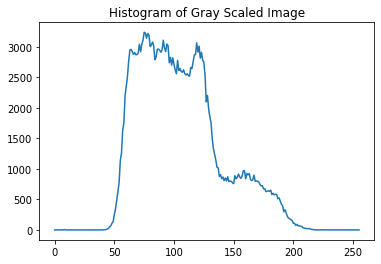

In [ ]:
histr = cv2.calcHist([image],[0],None,[256],[0,256])

plt.imshow(grayscaled_image, cmap=plt.get_cmap('gray'))  #plot gray image
plt.title('Gray Scaled Image')
plt.show()


plt.plot(histr) 
plt.title('Histogram of Gray Scaled Image')                        #plot its histogram
plt.show()

## <b>Task#5: </b>Binarize the input image using Otsu method

Threshold Computation

In [ ]:
#

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([image],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fun_min = np.inf
thresholder = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fun_min:
        fun_min = fn
        thresholder = i

print(thresholder)


112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


Binarization

In [ ]:
grayscaled_image = RGBtoGRAY(image)
Otsu_grayscaled_image=grayscaled_image
for m in range(1,len(image)):
  for n in range(1,len(image)):
    if grayscaled_image[m,n]>=thresholder:
        Otsu_grayscaled_image[m,n]=256
    else:
        Otsu_grayscaled_image[m,n]=0

Plotting

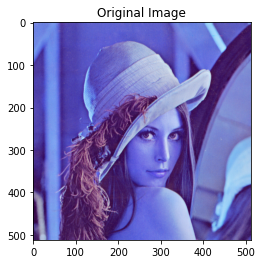

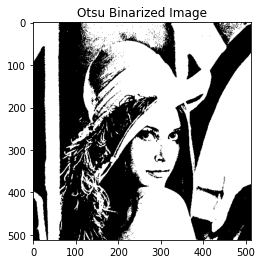

In [ ]:
plt.imshow(image)  #plot original image
plt.title('Original Image')
plt.show()


plt.imshow(Otsu_grayscaled_image, cmap=plt.get_cmap('gray')) 
plt.title('Otsu Binarized Image')                       
plt.show()

In [ ]:
!jupyter nbconvert --to PDF "first_colab.ipynb"

[NbConvertApp] WARNING | pattern u'first_colab.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run n